In [30]:
# Purpose: quantify y

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns
from statannot import add_stat_annotation

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [12]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/1_before_bmd/phase_I_II/LPR/240_timepoints/all_conc/quantify_y


In [13]:
# mac       - phase I && II - LPR - after_merging - 240 variables
# (made on 4/28/2021 in constance)
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030.0,9414.0,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030.0,9414.0,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030.0,9414.0,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030.0,9414.0,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030.0,9414.0,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


In [14]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

197

In [15]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

471

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


## Load morphological data for filtering wells that have dead fish

In [16]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


69395

In [17]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# 13 seconds took for 215 chemicals

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0,1030_9414_A03
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A04
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7,1030_9414_A05


Done, it took:13.5 seconds


In [18]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(46449, 246)
df_lpr_filtered.shape:(33570, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0,1030_9414_A03
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A04
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7,1030_9414_A05


In [19]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]


time_index_sec_start = 5
ori_max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)

num_time_points = 0
for time_index in range(int(ori_max_time_index_sec / group_size)):
    num_time_points += 1
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(ori_max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

#print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
#display(len(np.unique(df_lpr_min['chemical.id'])))
#print ("\nnp.unique(df_lpr_min['chemical.id']):")
#display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# took 6 seconds for 215 chemicals

interval:1 min
(before transforming for 1 min), df_lpr_min.shape:(33570, 4)
(after  transforming for 1 min), df_lpr_min.shape:(33570, 28)
Conversion of time interval is done. It took 4.3 seconds


In [20]:
display(df_lpr_min.head())
display(len(df_lpr_min))

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,0.0,0.0,1.4,103.2,96.9,82.9,28.4,0.0,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,46.2,0.0,0.0,42.4,122.9,145.8,94.5,0.0,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,7.5,0.0,40.6,20.3,45.0,58.3,28.2,0.0,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1,1030_11.2
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,1.7,0.0,2.2,16.3,0.9,20.5,8.8,0.0,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,10.4,2.9,6.5,128.0,173.5,178.3,90.8,0.0,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6,1030_1.0


33570

33570

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,0.0,0.0,1.4,103.2,96.9,82.9,28.4,0.0,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,46.2,0.0,0.0,42.4,122.9,145.8,94.5,0.0,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,7.5,0.0,40.6,20.3,45.0,58.3,28.2,0.0,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1,1030_11.2
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,1.7,0.0,2.2,16.3,0.9,20.5,8.8,0.0,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,10.4,2.9,6.5,128.0,173.5,178.3,90.8,0.0,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6,1030_1.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/1_before_bmd/phase_I_II/LPR/240_timepoints/all_conc/quantify_y
344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full_0_conc.png


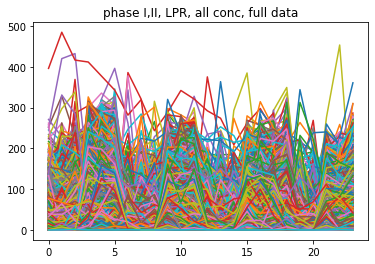

In [27]:
# Plot few lpr curves to check transition points
# all concentrations

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_lpr_min.iloc[10:123,time_index_start:time_index_start + num_time_points].values));
#plt.title('phase I,II, LPR, all conc, partial data')

ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));
plt.title('phase I,II, LPR, all conc, full data')

display(len(df_lpr_min))
display(df_lpr_min.head())


complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
#output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [ ]:
# dark only, mean displacement
column_name = 'y_mean'

y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,7:10], axis = 1).values)
#axis = 0 means along the column and axis = 1 means working along the row
y_arr = np.transpose(y_arr)
#display (len(y_arr)) # 5908
#display (y_arr)
'''array([[ 96.73333333],
       [ 37.23333333],...'''
df_y = pd.DataFrame(y_arr, columns=[column_name])
df_y["cycle"] = str("1_dark")
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,13:16], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_dark', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,19:22], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_dark', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,25:28], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_dark', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = column_name
order = ['1_dark', '2_dark', '3_dark', '4_dark']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

'''
add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_dark", "2_dark"), ("2_dark", "3_dark"), ("3_dark", "4_dark")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
'''
add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_dark", "2_dark"), ("2_dark", "3_dark"), ("3_dark", "4_dark")],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
plt.title('phase I,II, LPR, all conc, dark only, mean displacement')
plt.ylim((0, 90))

In [ ]:
# total displacement, dark only
y_arr = []
y_arr.append(df_lpr_min.iloc[:,7:10].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y = pd.DataFrame(y_arr, columns=['y_sum'])
df_y["cycle"] = str("1_dark")
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,13:16].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_dark', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,19:22].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_dark', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,25:28].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_dark', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = "y_sum"
order = ['1_dark', '2_dark', '3_dark', '4_dark']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)#.set_title('lalala')

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_dark", "2_dark"), ("2_dark", "3_dark"), ("3_dark", "4_dark")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.title('phase I_II (240 timepoints), LPR, all conc, dark only, total displacement')
plt.ylim((0, 300))

In [22]:
#'''## See sum of y values per interval in all ccp (chemical_conc_plate)
#0-6,
#6-12,
#12-18,
#18-24
trans_points = [2,8,14,20] # "Paritosh official"

df_lpr_min_ccp = df_lpr_min.copy()
#df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_lpr_min.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

#f_out = open("report.txt","w+")
values_sum_trans_2  = []
values_sum_trans_8  = []
values_sum_trans_14 = []
values_sum_trans_20 = []

print ("len(np.unique(df_lpr_min_ccp.chemical_conc_plate)):" + str(len(np.unique(df_lpr_min_ccp.chemical_conc_plate))))

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        #print ("\ntrans_point:" + str(trans_point))
        values_sum_in_this_time_interval = 0
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("type(values):\n" + str(type(values)))
 #           print ("values:\n" + str(values))
#            print ("values.sum():\n" + str(values.sum()))
            values_sum_in_this_time_interval = values_sum_in_this_time_interval + values.sum()
            #print ("len(values):\n" + str(len(values)))
            
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        #print ("arr_diff:"+str(arr_diff))
        print_this = "values_sum for trans_points " + str(trans_point) + " : " + str(round(values_sum_in_this_time_interval,2))
        #print (print_this)
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        #print (save_this)
        
        #print (index_of_max_arr_diff)
        #f_out.write(save_this)
        if (trans_point == 2):
            values_sum_trans_2.append(values_sum_in_this_time_interval)
        elif (trans_point == 8):
             values_sum_trans_8.append(values_sum_in_this_time_interval)
        elif (trans_point == 14):
            values_sum_trans_14.append(values_sum_in_this_time_interval)
        else: # (trans_point == 20):
            values_sum_trans_20.append(values_sum_in_this_time_interval)
        
#f_out.close()
print ("Biggest change of peaks in each ccp is identified")

len(np.unique(df_lpr_min_ccp.chemical_conc_plate)):2579
Biggest change of peaks in each ccp is identified


In [23]:
print (np.mean(values_sum_trans_2))
print (np.std(values_sum_trans_2))
print (np.max(values_sum_trans_2))
print (np.min(values_sum_trans_2))
print (np.min(values_sum_trans_8))
print (np.min(values_sum_trans_14))
print (np.min(values_sum_trans_20))

2199.6090504011627
1427.6937661847658
7852.2649944351015
0.0
0.0
0.0
0.0



transition points at 2->3 min
mean: 2199.61 , std: 1427.69
max: 7852.26 , min: 0.0

transition points at 8->9 min
mean: 1867.35 , std: 1186.0
max: 8939.29 , min: 0.0

transition points at 14->15 min
mean: 1591.03 , std: 988.66
max: 9263.18 , min: 0.0

transition points at 20->21 min
mean: 1642.16 , std: 1073.81
max: 7210.45 , min: 0.0


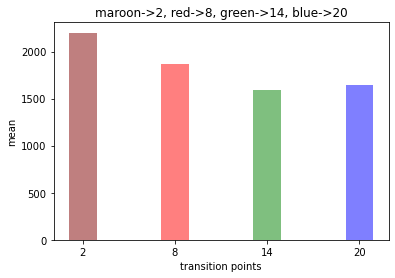

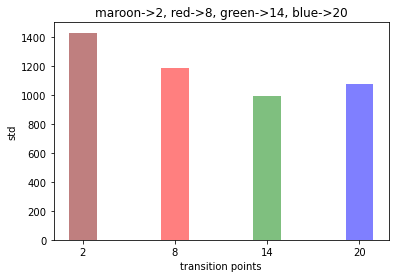

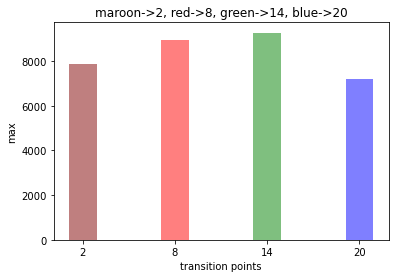

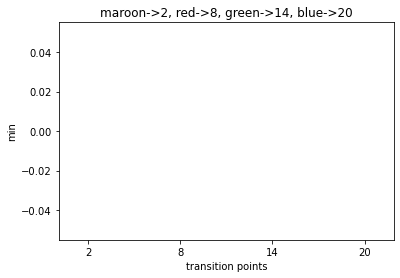

In [24]:
print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(values_sum_trans_2),2), ", std:", round(np.std(values_sum_trans_2),2))
print ("max:", round(np.max(values_sum_trans_2),2), ", min:", round(np.min(values_sum_trans_2),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(values_sum_trans_8),2), ", std:", round(np.std(values_sum_trans_8),2))
print ("max:", round(np.max(values_sum_trans_8),2), ", min:", round(np.min(values_sum_trans_8),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(values_sum_trans_14),2), ", std:", round(np.std(values_sum_trans_14),2))
print ("max:", round(np.max(values_sum_trans_14),2), ", min:", round(np.min(values_sum_trans_14),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(values_sum_trans_20),2), ", std:", round(np.std(values_sum_trans_20),2))
print ("max:", round(np.max(values_sum_trans_20),2), ", min:", round(np.min(values_sum_trans_20),2))

alpha=0.5

plt.bar("2", round(np.mean(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.mean(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.mean(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.mean(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("mean")
plt.show()


plt.bar("2", round(np.std(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.std(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.std(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.std(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("std")
plt.show()


plt.bar("2", round(np.max(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.max(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.max(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.max(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("max")
plt.show()

plt.bar("2", round(np.min(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.min(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.min(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.min(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("min")
plt.show()

In [25]:
df_lpr_min.get_value(10, 't1')

AttributeError: 'DataFrame' object has no attribute 'get_value'

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t1', 't2', 't3', 't4', 't5', 't6'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t7', 't8', 't9', 't10', 't11', 't12'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t13', 't14', 't15', 't16', 't17', 't18'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t19', 't20', 't21', 't22', 't23'])

In [ ]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp.head())

In [ ]:
display(len(df_lpr_min))
display(df_lpr_min.head())

In [ ]:
####### stop here
#a=b

In [ ]:
print (df_lpr_min['t3'])

In [ ]:
## Calculate MOV, AUC for all chemical concentrations.
df_delta = df_lpr_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()

trans_points = [2,8,14,20] # "official"
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            df_delta['MOV' + str(trans_index + 1)] \
            = df_lpr_min['t' + str(trans_point + 1)] \
            - df_lpr_min['t' + str(trans_point)]
        else:
            df_delta['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))

display(df_delta.head())
display(len(df_delta))

cwd = os.getcwd()
print (cwd)

df_delta.to_csv("delta_mov_auc_all_conc.csv", index=False)

In [ ]:
######## Investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()